<a href="https://colab.research.google.com/github/LukeBarboza/AI-Codes/blob/HandsOn_classificacao_exercicio_1/Exercicio_Classificacao_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Imports
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

#Curva de ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Classificação Multiclasse
from sklearn.svm import SVC # Define automaticamente entre OvO (One Vs One) ou OvR(One vs All The Rest)

#caso você queira explicitamente escolher entre um dos dois

#OvR One Versus All The Rest
from sklearn.multiclass import OneVsRestClassifier

#OvO One Versus One
from sklearn.multiclass import OneVsOneClassifier

#escalonamento das entradas
from sklearn.preprocessing import StandardScaler

#Classificação Multirótulo
from sklearn.neighbors import KNeighborsClassifier

# Teste de Hiperparametros
from sklearn.model_selection import GridSearchCV

In [ ]:
#Returning values from sklearn
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

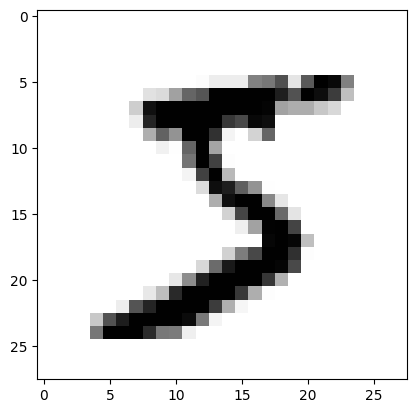

In [5]:
#Looking at one algarism in dataset
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.show()

In [6]:
#Convertendo y para inteiro
y = y.astype(np.uint8)
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [24]:
#Dividindo em dados para treinamento e para teste
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [29]:
#Classificação Multirrótulo
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
knn_clf.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [31]:
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

#Calculando matriz de confusão
confusion_matrix(y_train, y_train_pred)

array([[5884,    3,    3,    0,    1,    4,   18,    1,    5,    4],
       [   3, 6708,    8,    1,    2,    1,    2,   10,    3,    4],
       [  53,   56, 5706,   13,    9,    3,    8,   87,   16,    7],
       [  11,   16,   38, 5898,    1,   68,    3,   34,   39,   23],
       [   8,   59,    1,    0, 5634,    0,   12,    9,    3,  116],
       [  24,   13,    7,   80,    8, 5195,   58,    5,   10,   21],
       [  27,   13,    1,    0,    6,   18, 5850,    0,    3,    0],
       [   5,   60,   14,    3,   22,    2,    0, 6091,    2,   66],
       [  29,   76,   19,   83,   39,   97,   26,   14, 5416,   52],
       [  18,   15,    7,   39,   57,   12,    3,   80,    9, 5709]])

In [30]:
#Acurácia
accuracy1 = knn_clf.score(X_test, y_test)
accuracy1 #97 por cento de acurácia

0.9705